## Speech To Text(STT)

* STT는 음성을 입력받아 그에 해당하는 구문(문자열)을 얻는 기술
* 딥러닝을 이용한 STT 모델에는 WaveNet 등이 존재
* SpeechRecognition을 이용하면 모델을 학습시키지 않고도 간편하게 구현 가능

### 라이브러리 소개 및 설치

* 음성 인식 기술은 음성 데이터가 대부분 크고, 관련 기술 코드도 상당히 길어 구현이 힘듬
* [SpeechRecognition](https://pypi.org/project/SpeechRecognition/)을 사용하면 이러한 과정 없이 음성 인식 기술을 이용할 수 있음

### Requirements

* SpeechRecognition
    * conda install -c conda-forge speechrecognition

* LibRosa
    * conda install -c conda-forge librosa

__Do not install using pip.__

### Recognizer

* SpeechRecognition 라이브러리의 기능을 이용하기 위해서 Recognizer 객체를 생성

In [1]:
import speech_recognition as sr

r = sr.Recognizer()

__여러 기업에서 제공하는 음성 인식 기술 사용 가능__

* recognize_google() - Google Web Speech API
* recognize_google_cloud() - Google Cloud Speech
* recognize_bing() - Microsoft Bing Speech
* recognize_houndify() - SoundHound Houndify
* recognize_ibm() - IBM Speech to Text
* recognize_wit() - Wit.ai
* recognize_sphinx() - CMU Sphinx (Sphinx는 오프라인으로 동작하며, 나머지 모든 함수는 인터넷 연결이 되어야만 사용 가능)


Since SpeechRecognition ships with a default API key for the Google Web Speech API, you can get started with it right away.

**Caution:** The default key provided by SpeechRecognition is for testing purposes only, and __Google may revoke it at any time.__ It is not a good idea to use the Google Web Speech API in production.

### 음성 데이터

* SpeechRecognition 지원 파일 형식
    * WAV
    * AIFF
    * AIFF-C
    * FLAC
* OpenSpeechRepository에서 제공하는 Harvard Sentence 데이터 사용
    * http://www.voiptroubleshooter.com/open_speech/
* SpeechRecognition을 사용하기 위해 데이터를 AudioFile 객체로 변환

In [2]:
import urllib.request

url="http://www.voiptroubleshooter.com/open_speech/american/OSR_us_000_0010_8k.wav"
urllib.request.urlretrieve(url, 'american.wav')

('american.wav', <http.client.HTTPMessage at 0x1fb9f278b20>)

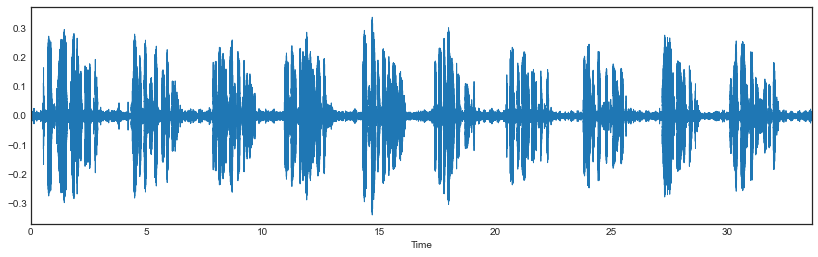

In [3]:
# Check and play the wav file

import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

fig = plt.figure(figsize=(14,4))
american_wav, rate = librosa.core.load('american.wav')
librosa.display.waveplot(american_wav, sr=rate)

ipd.Audio(american_wav, rate=rate)

### 음성 인식

### 영어

* SpeechRecognition이 기본으로 지원하는 언어
* STT를 구현하기 위해선 먼저 recognizer의 record 함수를 이용해 데이터를 입력
* recognize를 이용해 각 기업에서 제공하는 api를 통해 음성에 해당하는 구문을 얻을 수 있음

In [4]:
american_audio = sr.AudioFile("american.wav")

with american_audio as source:
    audio = r.record(source)
    
r.recognize_google(audio_data=audio, language='en-US')

"Birch canoe slid on the smooth plank glue the sea to a dark blue background it is easy to tell the depth of the well these days a chicken leg of a variegated price is often served in Randall's the juice of lemons makes find the boxes on the side the pump truck the ha grimstead top corn and garbage for hours of City Works in a large size and stockings and hard to sell"

* record 함수를 사용할 때 duration을 지정하면 시작 지점에서 원하는 초만큼의 데이터만 입력 가능
* 지정된 음성에 대한 문자열만 얻는 것을 볼 수 있음

In [5]:
with american_audio as source:
    audio = r.record(source, duration=4)
    
r.recognize_google(audio_data=audio, language='en-US')

'the Birch canoe slid on the smooth planks'

* offset을 지정하면 offset에 해당하는 초부터 데이터를 입력
* duration과 offset을 이용해 원하는 지점, 범위만큼 데이터 입력 가능
* 단, 앞뒤 데이터를 고려하는 특성 상 데이터를 일부만 입력하면 상대적으로 성능이 떨어질 수 있음
* 결과를 보면 같은 지점인데도 아까와는 다른 결과가 나오는 것을 볼 수 있음

In [6]:
with american_audio as source:
    audio = r.record(source, offset=2)
    
r.recognize_google(audio_data=audio, language='en-US')

"turn on the smooth plank glue the seat to a dark blue background to tell the depth of the well these days is a very good price is often served in Randall's the juice of lemons makes find the boxes down beside the pump truck the Hogs are fed top corn and garbage for hours of City Works in a large size and stockings and hard to sell"

In [7]:
with american_audio as source:
    audio = r.record(source, offset=2, duration = 4)
    
r.recognize_google(audio_data=audio, language='en-US')

'turn on the smooth planks'

### 중국어(Chinese - Mandarim)

* SpeechㅡRecognition은 영어 외에도 중국어, 한국어 등 다양한 언어를 입력할 수 있음
* 단 recognize를 사용할 때 language 인자로 해당 언어에 대한 정보를 명시해주어야 함

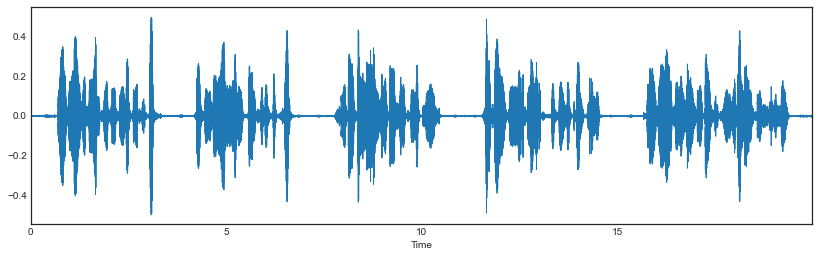

In [8]:
# Get a chinese speech data from Harvard University and check the wave file.

url="http://www.voiptroubleshooter.com/open_speech/chinese/OSR_cn_000_0072_8k.wav"
urllib.request.urlretrieve(url, 'chinese.wav')

chinese_audio = sr.AudioFile("chinese.wav")

fig = plt.figure(figsize=(14,4))
chinese_wav, rate = librosa.core.load('chinese.wav')
librosa.display.waveplot(chinese_wav, sr=rate)

ipd.Audio(chinese_wav, rate=rate)

In [9]:
# Run speech recognition engine.

with chinese_audio as source:
    audio = r.record(source)
    
r.recognize_google(audio_data=audio, language='zh-CN')

'院子门口不远处就是一个地铁站这是一个美丽而神奇的景象树上长满了又大又甜的桃子海豚和鲸鱼的表演是很好看的节目邮局门前的人行道上有一个蓝色的邮箱'

### 프랑스어(French)

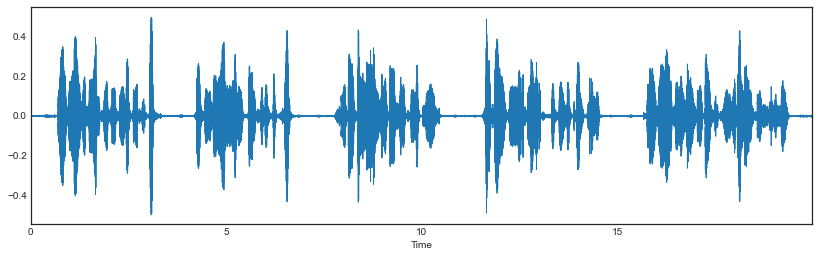

In [10]:
# Get a French speech data from Harvard University and check the wave file.

url="http://www.voiptroubleshooter.com/open_speech/french/OSR_fr_000_0041_8k.wav"
urllib.request.urlretrieve(url, 'french.wav')

french_audio = sr.AudioFile("french.wav")

fig = plt.figure(figsize=(14,4))
french_wav, rate = librosa.core.load('french.wav')
librosa.display.waveplot(chinese_wav, sr=rate)

ipd.Audio(french_wav, rate=rate)

In [11]:
# Run speech recognition engine.

with french_audio as source:
    audio = r.record(source)
    
r.recognize_google(audio_data=audio, language='fr-FR')

"pourrais-je avoir un verre d'eau la SNCF assurera un train sur 3 les coupoles de l'immense palais s'écroulèrent on apercevait la voile blanche du petit plateau ils sont tiny douleur Nice coup ce soit toujours plus que tu que la mère tu gagneras les langues vont bon train de soleil joue à cache-cache avec les nuages l'animal le regarde avec reconnaissance ils sont juste en face sur le toit parfois il me questionne sur ma vie je garde un souvenir ému de nuit la brebis et dans sa litière sèche c'est le nerf de la guerre d'habitude pour faire ça nous nous sommes tristes et très abattu sa discrétion m'étonnait énormément comme prenez-vous ma joie"

### 한국어(Korean)

* https://www.dropbox.com/s/fp8p8dspu74eq7x/korean.wav

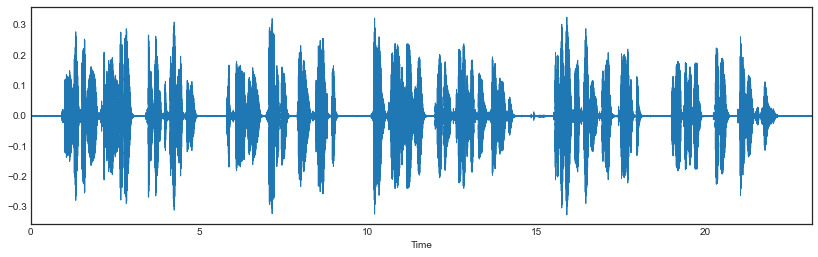

In [12]:
# Get a Korean speech data from the above link site.

# url="https://www.dropbox.com/s/fp8p8dspu74eq7x/korean.wav"
# urllib.request.urlretrieve(url, 'korean.wav')

korean_audio = sr.AudioFile("korean.wav")

fig = plt.figure(figsize=(14,4))
korean_wav, rate = librosa.core.load('korean.wav')
librosa.display.waveplot(korean_wav, sr=rate)

ipd.Audio(korean_wav, rate=rate)

In [18]:
# Run speech recognition engine.

with korean_audio as source:
    audio = r.record(source)
    
r.recognize_google(audio_data=audio, language='ko-KR')

'죽는 날까지 하늘을 우러러 한점 부끄럼이 없기를 잎새에이는 바람에도 나는 괴로워했다 별을 노래하는 마음으로 모든 죽어가는 것을 사랑해야지 그리고 나한테 주어진 길을 걸어야겠다 오늘 밤에도 별이 바람에 스치운다'